In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


In [49]:
df = pd.read_csv("/kaggle/input/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [50]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [51]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [53]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [54]:
df.shape

(1470, 35)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [56]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [57]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [58]:
df = df.drop([
    'EmployeeCount',
    'EmployeeNumber',
    'Over18',
    'StandardHours'
], axis=1)


In [59]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [60]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [61]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

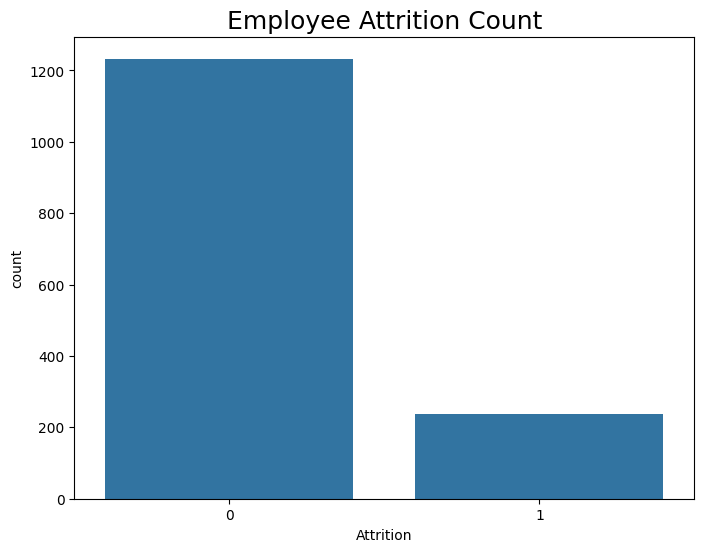

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count", fontsize=18)
plt.show()

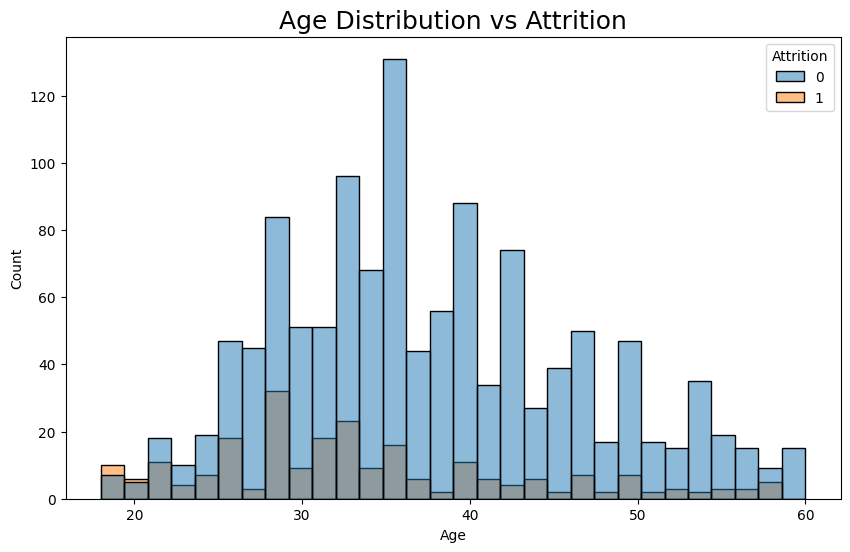

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="Attrition", bins=30)
plt.title("Age Distribution vs Attrition", fontsize=18)
plt.show()

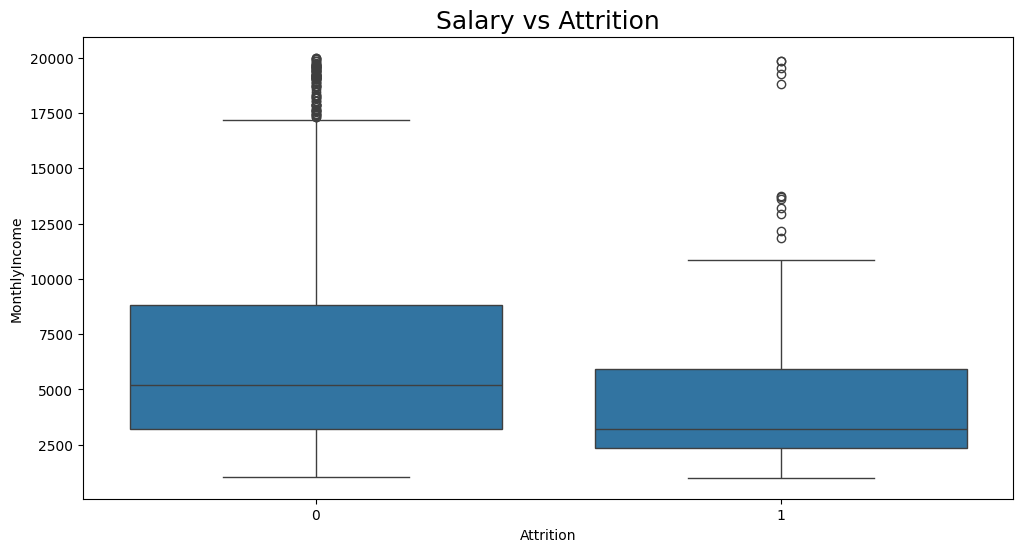

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Salary vs Attrition", fontsize=18)
plt.show()

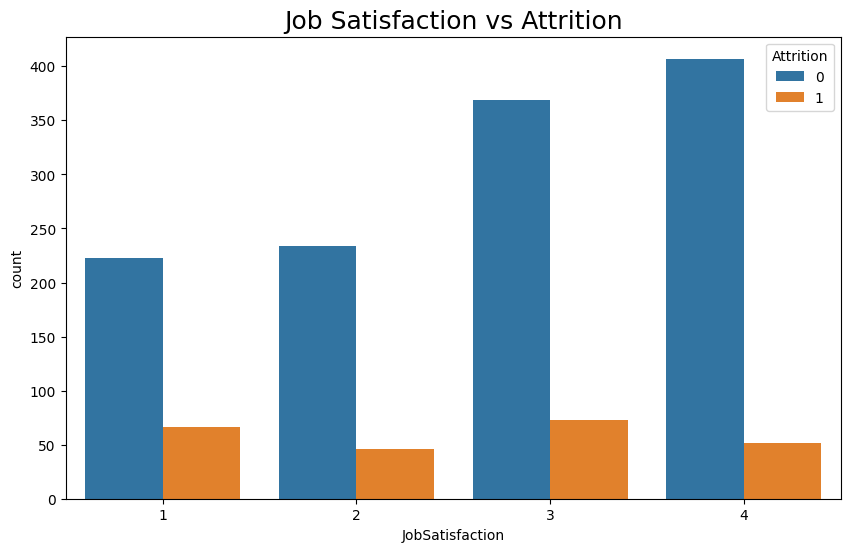

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition", fontsize=18)
plt.show()

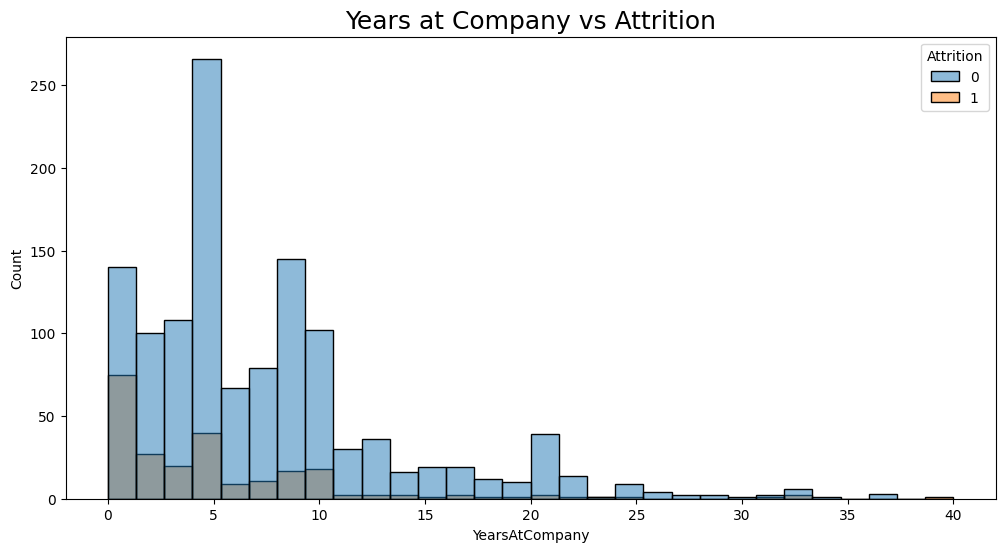

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', bins=30)
plt.title("Years at Company vs Attrition", fontsize=18)
plt.show()

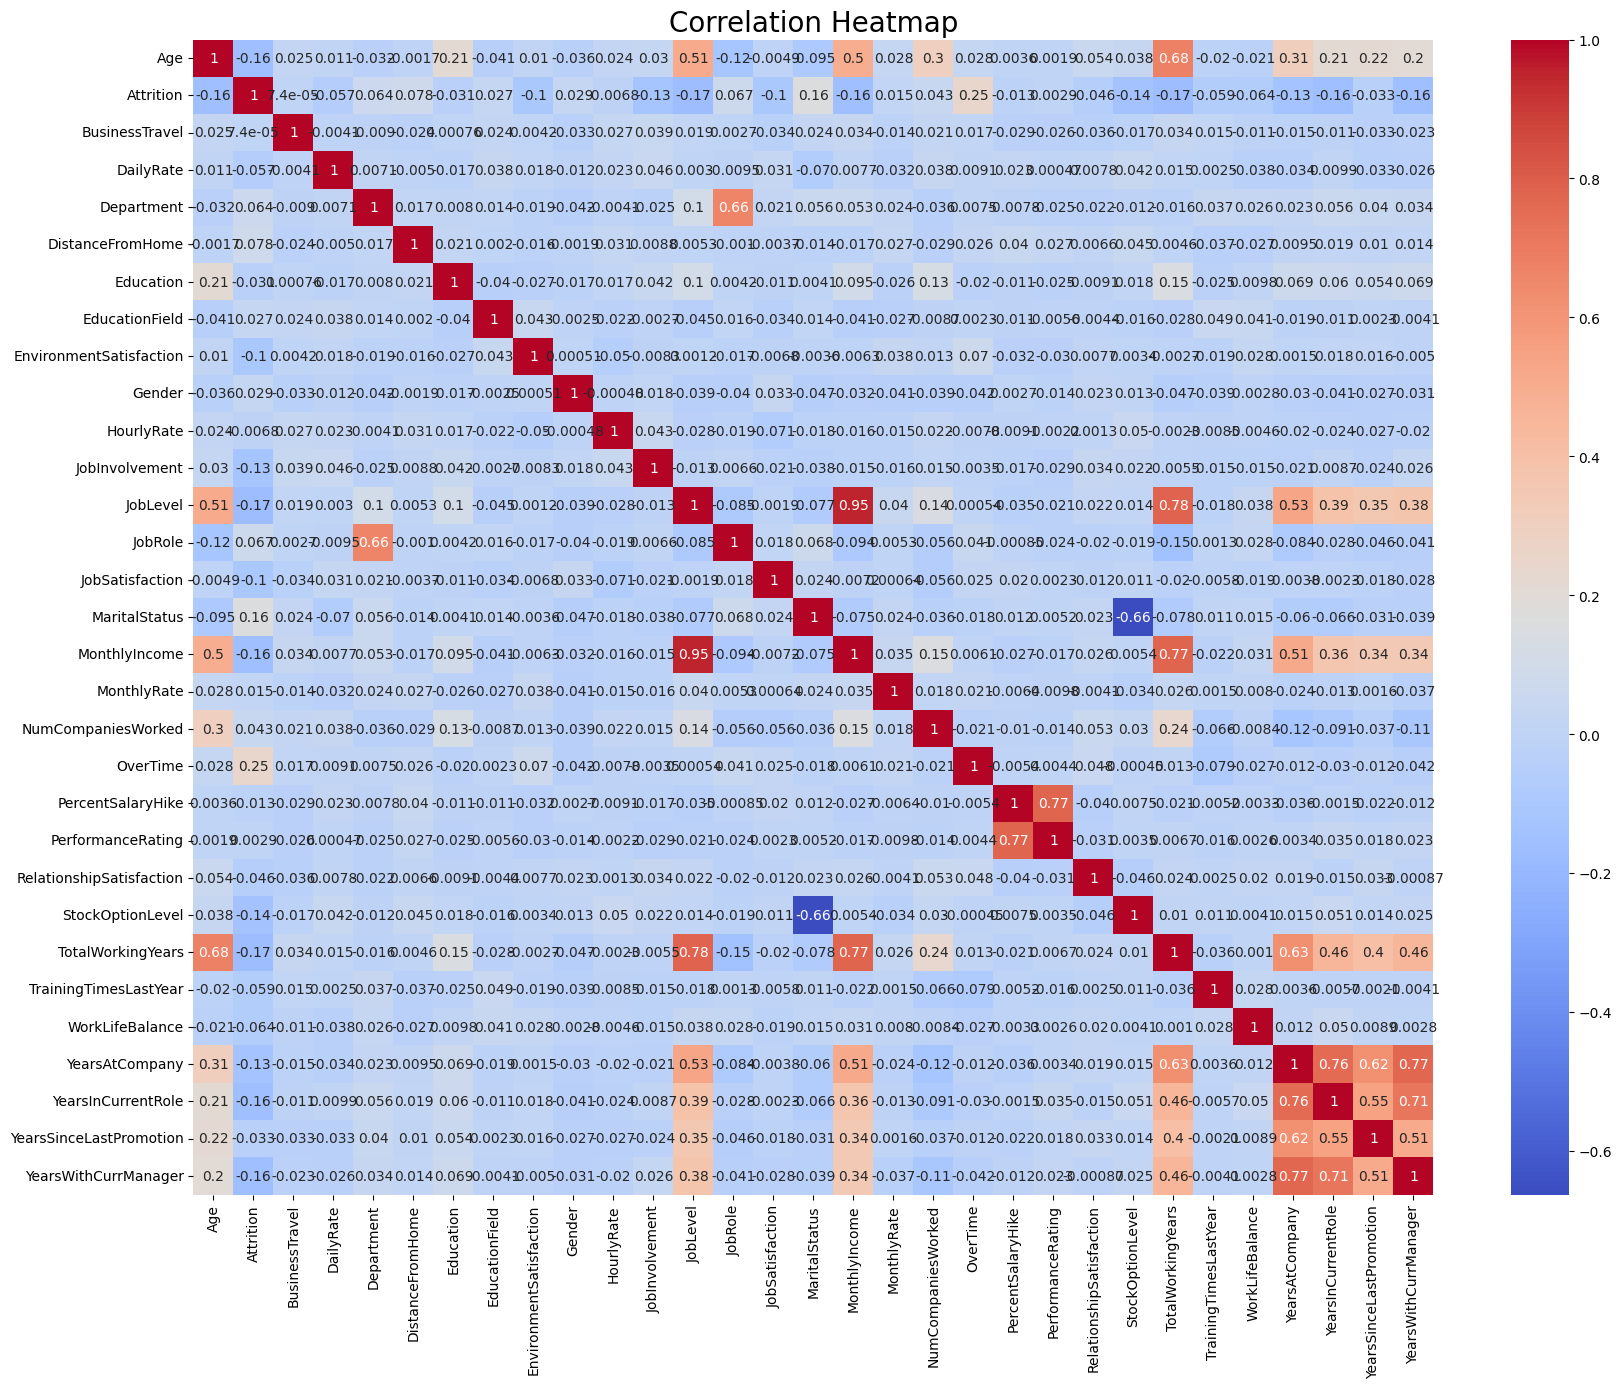

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [68]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [69]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [70]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,2,350,1,21,2,5,3,1,57,...,3,2,3,2,3,3,1,1,0,0
727,18,0,287,1,5,2,1,2,1,73,...,3,4,0,0,2,3,0,0,0,0
254,29,2,1247,2,20,2,2,4,1,45,...,3,4,1,10,2,3,3,2,0,2
1175,39,2,492,1,12,3,3,4,1,66,...,4,3,0,7,3,3,5,4,1,0
1341,31,2,311,1,20,3,1,2,1,89,...,3,1,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2,750,1,28,3,1,2,1,46,...,3,4,2,10,3,2,10,9,6,8
1294,41,2,447,1,5,3,1,2,1,85,...,3,1,0,11,3,1,3,2,1,2
860,22,1,1256,1,3,4,1,3,1,48,...,3,2,1,1,5,3,0,0,0,0
1459,29,2,1378,1,13,2,4,4,1,46,...,3,1,1,10,2,3,4,3,0,3


In [73]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int64

In [74]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,2,866,2,5,3,3,4,1,84,...,3,4,0,6,4,3,5,4,1,3
184,53,2,1084,1,13,2,3,4,0,57,...,3,3,2,5,3,3,4,2,1,3
1222,24,2,240,0,22,1,0,4,1,58,...,3,3,1,1,2,3,1,0,0,0
67,45,2,1339,1,7,3,1,2,1,59,...,3,3,1,25,2,3,1,0,0,0
220,36,2,1396,1,5,2,1,4,1,62,...,3,4,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,2,304,2,2,3,4,4,1,60,...,4,3,0,6,5,3,6,5,1,4
560,34,2,167,1,8,5,1,2,0,32,...,3,3,1,7,3,3,0,0,0,0
945,50,2,1322,1,28,3,1,4,0,43,...,3,2,0,25,2,3,3,2,1,2
522,37,2,1225,1,10,2,1,4,1,80,...,3,1,0,4,2,3,1,0,0,0


In [75]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
567     0
560     0
945     0
522     0
651     0
Name: Attrition, Length: 294, dtype: int64

In [76]:
log_reg_pipeline = Pipeline([

    ('imputer', SimpleImputer(strategy='mean')),
    
    ('scaler', StandardScaler()),
    
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

In [77]:
log_reg_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

In [78]:
log_reg_pipeline.fit(X_train, y_train)

y_pred_log = log_reg_pipeline.predict(X_test)

In [79]:
cv_scores_log = cross_val_score(
    log_reg_pipeline, X, y, cv=5, scoring='accuracy'
)

print("Logistic CV Scores:", cv_scores_log)
print("Mean Accuracy:", cv_scores_log.mean())

Logistic CV Scores: [0.88095238 0.86734694 0.86054422 0.8537415  0.86734694]
Mean Accuracy: 0.865986394557823


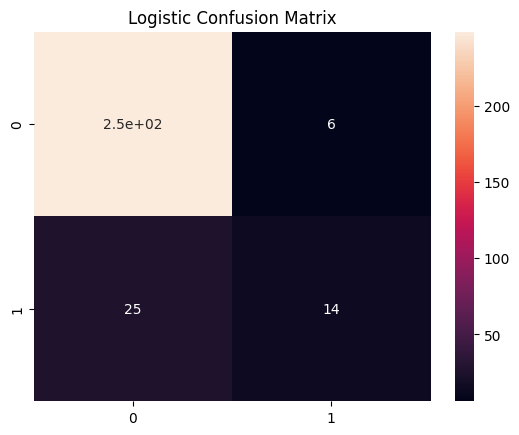

In [80]:
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True)
plt.title("Logistic Confusion Matrix")
plt.show()

In [81]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [82]:
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('decision_tree', DecisionTreeClassifier())
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

In [83]:
dt_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('decision_tree', DecisionTreeClassifier())])

In [84]:
cv_scores_dt = cross_val_score(dt_pipeline, X, y, cv=5)
print("Decision Tree Accuracy:", cv_scores_dt.mean())

Decision Tree Accuracy: 0.782312925170068


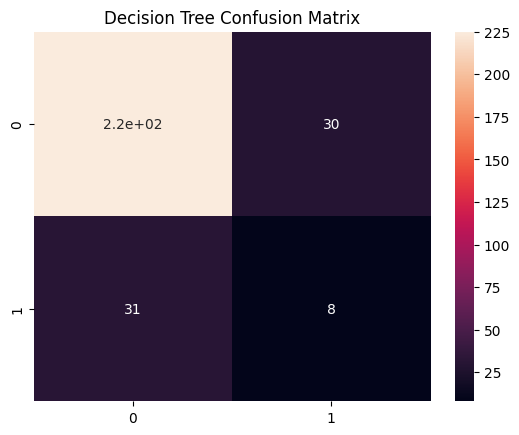

In [85]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [86]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),    
    ('random_forest', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [87]:
rf_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('random_forest', RandomForestClassifier())])

In [88]:
cv_scores_rf = cross_val_score(rf_pipeline, X, y, cv=5)

print("Random Forest Accuracy:", cv_scores_rf.mean())

Random Forest Accuracy: 0.8598639455782312


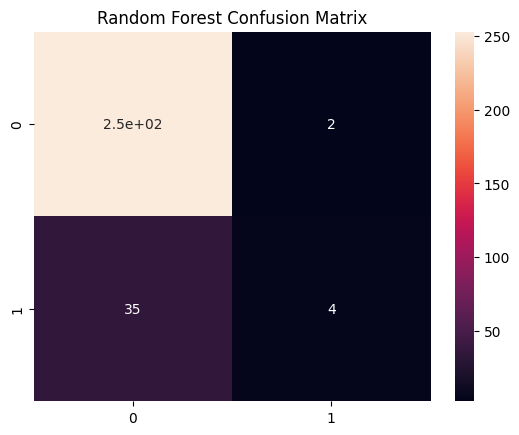

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [90]:
print("Logistic Regression:", cv_scores_log.mean())
print("Decision Tree:", cv_scores_dt.mean())
print("Random Forest:", cv_scores_rf.mean())

Logistic Regression: 0.865986394557823
Decision Tree: 0.782312925170068
Random Forest: 0.8598639455782312


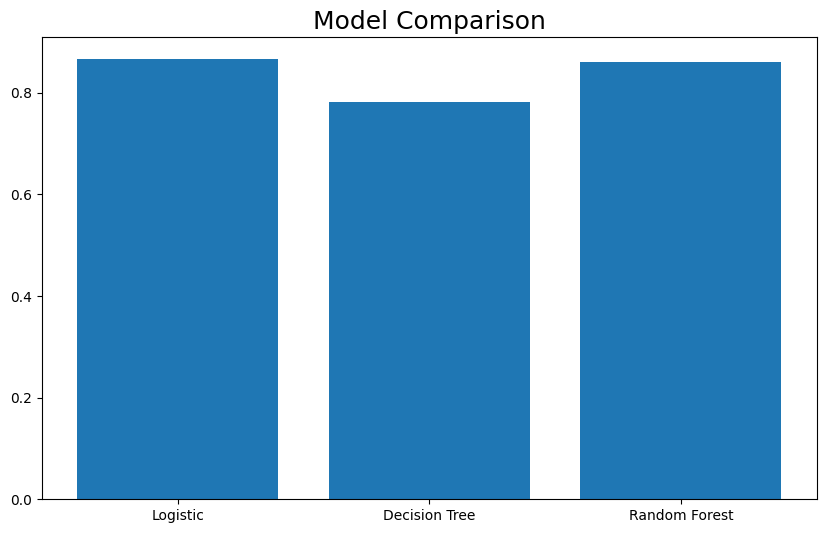

In [91]:
models = ['Logistic', 'Decision Tree', 'Random Forest']

scores = [
    cv_scores_log.mean(),
    cv_scores_dt.mean(),
    cv_scores_rf.mean()
]

plt.figure(figsize=(10,6))
plt.bar(models, scores)
plt.title("Model Comparison", fontsize=18)
plt.show()

In [92]:
lsr=LogisticRegression()
lsr.fit(X,y)

LogisticRegression()

In [93]:
new_data = pd.DataFrame({

'Age':35,
'BusinessTravel':1,
'DailyRate':800,
'Department':1,
'DistanceFromHome':5,
'Education':3,
'EducationField':1,
'EnvironmentSatisfaction':3,
'Gender':1,
'HourlyRate':60,
'JobInvolvement':3,
'JobLevel':2,
'JobRole':2,
'JobSatisfaction':3,
'MaritalStatus':1,
'MonthlyIncome':5000,
'MonthlyRate':15000,
'NumCompaniesWorked':2,
'OverTime':0,
'PercentSalaryHike':12,
'PerformanceRating':3,
'RelationshipSatisfaction':3,
'StockOptionLevel':1,
'TotalWorkingYears':10,
'TrainingTimesLastYear':3,
'WorkLifeBalance':3,
'YearsAtCompany':5,
'YearsInCurrentRole':3,
'YearsSinceLastPromotion':1,
'YearsWithCurrManager':3

}, index=[0])

In [94]:
new_data1 = pd.DataFrame({

'Age':24,
'BusinessTravel':2,
'DailyRate':300,
'Department':2,
'DistanceFromHome':25,
'Education':2,
'EducationField':2,
'EnvironmentSatisfaction':1,
'Gender':1,
'HourlyRate':40,
'JobInvolvement':1,
'JobLevel':1,
'JobRole':4,
'JobSatisfaction':1,
'MaritalStatus':0,
'MonthlyIncome':2000,
'MonthlyRate':8000,
'NumCompaniesWorked':5,
'OverTime':1,
'PercentSalaryHike':10,
'PerformanceRating':3,
'RelationshipSatisfaction':1,
'StockOptionLevel':0,
'TotalWorkingYears':2,
'TrainingTimesLastYear':1,
'WorkLifeBalance':1,
'YearsAtCompany':1,
'YearsInCurrentRole':0,
'YearsSinceLastPromotion':0,
'YearsWithCurrManager':0

}, index=[0])

In [95]:
p = lsr.predict(new_data1)

print(p)

if p[0]==0:
    print('Employee will STAY')
else:
    print('Employee will LEAVE')

[1]
Employee will LEAVE
